# 線形回帰問題　y = 3x+5 の学習

## データセットの作成

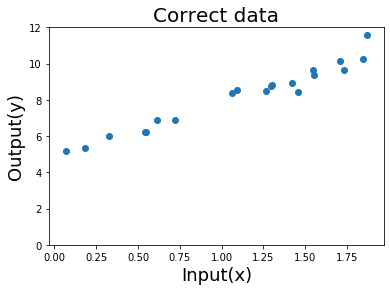

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#X(入力データ)の作成
#↓サンプルmin値
min_of_sam = 0
#↓サンプルmax値
max_of_sam = 2
#↓サンプル数
num_of_sam = 20
#↓minからmaxまでnumの数だけランダムに数を生成
X = np.random.uniform(min_of_sam,max_of_sam,num_of_sam)

#XをもとにT(正解データ)を生成
T = X*3+5

#ノイズの生成
#↓numの数だけ平均0 標準偏差0.5の乱数を生成する
noise = np.random.normal(0,0.5,num_of_sam)

#Tにノイズを足し合わせて正解データを上書き
T = T + noise

#----正解データ完成----#

#プロットを行う
#↓正解データを点でプロット
plt.scatter(X,T)
plt.title("Correct data",FontSize=20)
plt.xlabel("Input(x)",FontSize=18)
plt.ylabel("Output(y)",FontSize=18)
plt.ylim(0,12)
plt.show()

## 重みwとバイアスbの学習

In [2]:
#恒等関数の作成
def identity(x):
    return x

#二乗和誤差の関数を作成
def square_sum(Y,T):
    return np.sum(np.square(Y-T))/2

#重みの生成(初期値を0とする)
w = 0
#バイアスの生成(初期値を0とする)
b = 0
#学習率の設定
eta = 0.01
#イテレーション数の設定
iteration = 30
#損失関数の推移保存リスト
E_save = np.array([])

#学習
for i in range(iteration):
    
    #--順伝番 Forward propagation--
    #↓出力の計算
    Y = identity(w*X+b)
    #↓損失の計算(二乗和誤差を用いる)
    E = square_sum(Y,T)
    #↓損失の保存
    E_save = np.append(E_save,E)
    
    #--逆伝番 Backward propagation--
    #↓Eをwで偏微分する
    dw = np.sum(X*(Y-T))
    #重みの更新
    w = w - eta*dw
    #↓Eをbで偏微分する
    db = np.sum(Y-T)
    #バイアスの更新
    b = b - eta*db

#学習結果を表示
print("重みの値は{0:.2f}".format(w))
print("バイアスの値は{0:.2f}".format(b))

重みの値は3.58
バイアスの値は4.13


## 学習結果のプロット

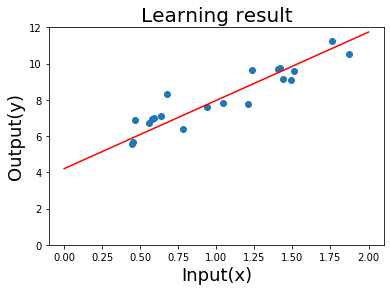

In [8]:
#学習結果を線でプロットするためにデータを用意
#学習結果のxデータを生成
x_line = np.linspace(0,2,10)
#学習結果のyデータを生成
y_line = w*x_line+b

#プロットを行う
#↓正解データを点でプロット
plt.scatter(X,T)
#↓学習結果を線でプロット
plt.plot(x_line,y_line,Color="red")
plt.title("Learning result",FontSize=20)
plt.xlabel("Input(x)",FontSize=18)
plt.ylabel("Output(y)",FontSize=18)
plt.ylim(0,12)
plt.show()

## 損失推移のプロット

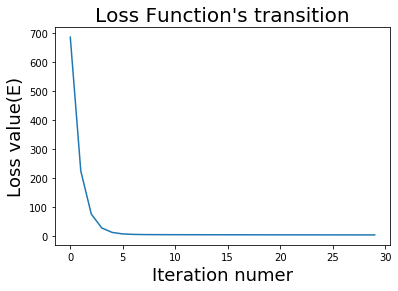

In [4]:
#プロットを行う
#↓損失とイテレーション数の関係を点でプロット
plt.plot(E_save)
plt.title("Loss Function's transition",FontSize=20)
plt.xlabel("Iteration numer",FontSize=18)
plt.ylabel("Loss value(E)",FontSize=18)
plt.show()